### Importar as bibliotecas necessárias e carregar o dataset

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Carregar o dataset
digits = load_digits()

# Dividir em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

### Treinar o modelo de árvore de decisão

In [3]:
# Inicializar o classificador de árvore de decisão
clf = DecisionTreeClassifier()

# Treinar o modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Avaliar o desempenho do modelo

In [4]:
# Fazer predições no conjunto de teste
y_pred = clf.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.8639


Com uma acurácia de 0.8583, o modelo de árvore de decisão está fazendo um bom trabalho de classificação inicial. Agora, podemos seguir para o Item 2: Avaliação dos Ganhos com a Utilização de Modelos Ensemble.

Modelos Ensemble, como Random Forest ou Gradient Boosting, combinam várias árvores de decisão para melhorar o desempenho geral.

### Vamos começar usando o Random Forest para avaliar os ganhos.

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar o modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
rf_clf.fit(X_train, y_train)

# Fazer predições no conjunto de teste
y_pred_rf = rf_clf.predict(X_test)

# Avaliar a acurácia do modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia do modelo Random Forest: {accuracy_rf:.4f}')


Acurácia do modelo Random Forest: 0.9722


Ótimo resultado! Com uma acurácia de 0.9722 no modelo Random Forest, houve uma melhoria significativa em relação à árvore de decisão simples, que teve uma acurácia de 0.8583. Isso demonstra como os modelos Ensemble, como o Random Forest, podem aumentar o desempenho ao combinar várias árvores de decisão.

## Treinar e avaliar o modelo XGBoost

In [6]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Inicializar o modelo XGBoost
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=10, random_state=42)

# Treinar o modelo XGBoost
xgb_clf.fit(X_train, y_train)

# Fazer predições no conjunto de teste
y_pred_xgb = xgb_clf.predict(X_test)

# Avaliar a acurácia do modelo XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Acurácia do modelo XGBoost: {accuracy_xgb:.4f}')


Acurácia do modelo XGBoost: 0.9694


Com uma acurácia de 0.9694 usando o XGBoost, o modelo apresentou um desempenho muito próximo ao do Random Forest (0.9722), mas ainda uma pequena diferença.
Comparando os modelos:

    Árvore de Decisão: 0.8583
    Random Forest: 0.9722
    XGBoost: 0.9694

Isso mostra que tanto o Random Forest quanto o XGBoost são superiores à árvore de decisão simples, com o Random Forest ligeiramente à frente neste caso.

## Visualização da Árvore de Decisão e Medida de Impureza.

Vamos usar o GINI como critério de impureza

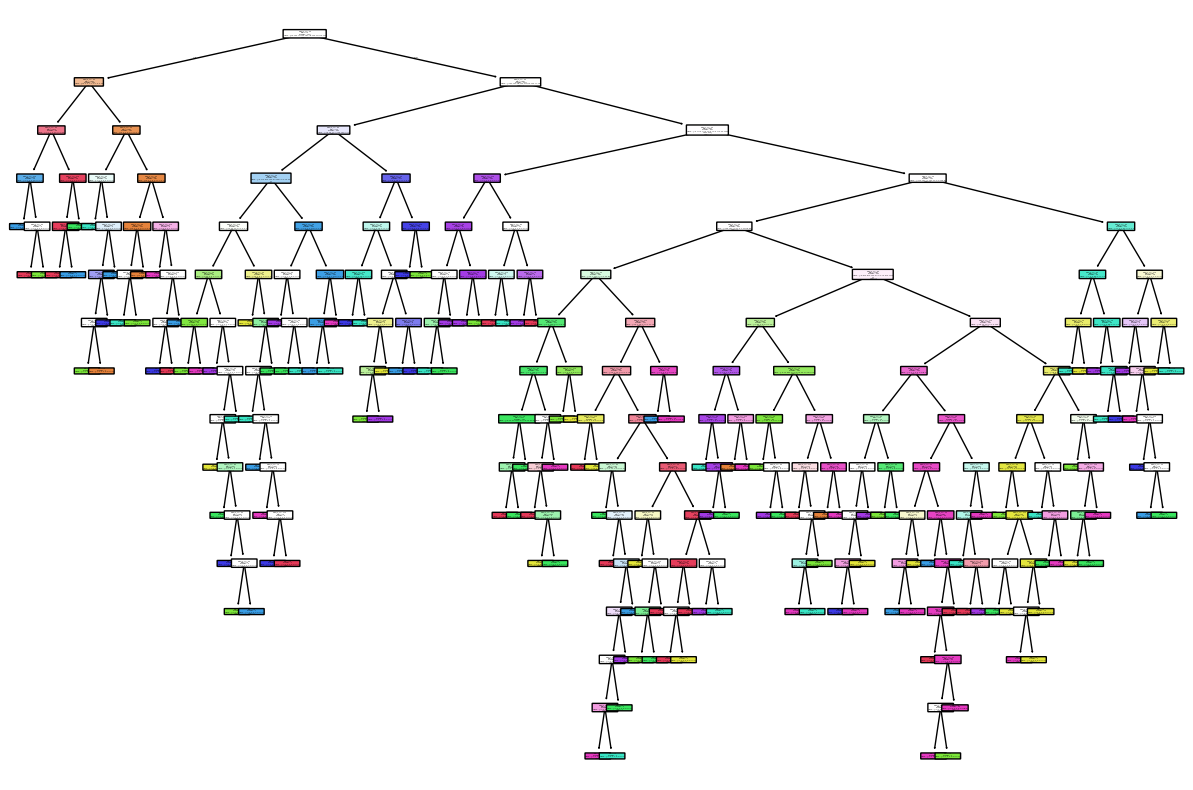

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Treinar a árvore de decisão com critério de impureza 'gini'
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Fazer predições
y_pred_gini = clf_gini.predict(X_test)

# Plotar a árvore de decisão
plt.figure(figsize=(15,10))
plot_tree(clf_gini, filled=True, feature_names=digits.feature_names, class_names=digits.target_names.astype(str), rounded=True)
plt.show()


Vamos tentar agora com o Entropy

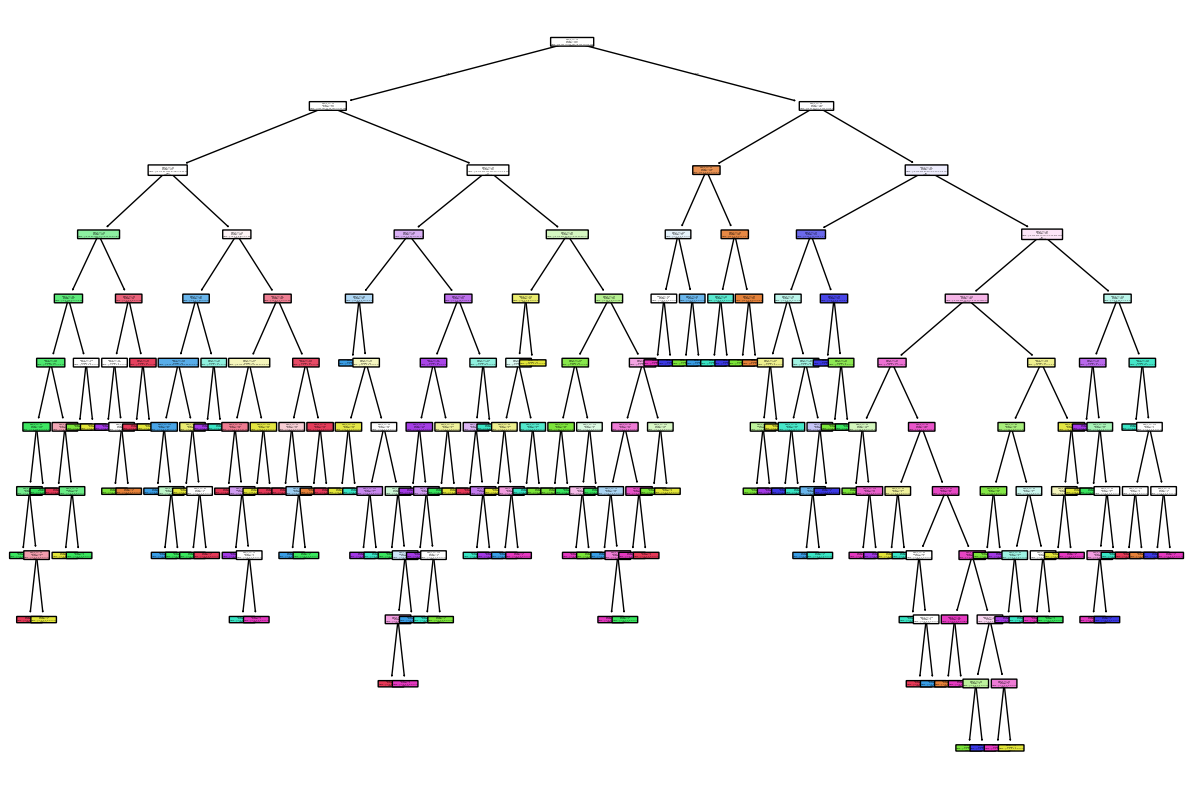

In [8]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Visualizar a árvore
plt.figure(figsize=(15,10))
plot_tree(clf_entropy, filled=True, feature_names=digits.feature_names, class_names=digits.target_names.astype(str), rounded=True)
plt.show()


A Entropia é mais sensível a mudanças na distribuição de classes, enquanto a Impureza de Gini é uma métrica mais rápida de calcular e levemente menos sensível.
Ambas as medidas resultam em árvores semelhantes, mas podem criar divisões um pouco diferentes dependendo dos dados.

In [11]:
import pickle

# Salvar o modelo treinado
with open('models/xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_clf, model_file)
